# Esercizio 
Dal database AdventureWorks estraiamo la tabella dimproduct
* Sulla colonna DealerPrice, utilizzando il metodo .round(), arrotondiamo i valori alle due cifre decimali, e poi al valore intero più vicino
* Utilizzando il metodo .clip(), facciamo in modo che i valori siano compresi tra un minimo di 0 e un massimo di 1000

In [1]:
from sqlalchemy import create_engine
import dotenv
import os
import pandas as pd
dotenv.load_dotenv(override=True)
username = os.getenv('username')
password = os.getenv('password')
host = os.getenv('host')
dbname = os.getenv('dbname')

import pandas as pd
dbname = "AdventureWorksDW"
conn_string = f"mysql+pymysql://{username}:{password}@{host}/{dbname}"
db_engine = create_engine(conn_string)
query = """SELECT *
        FROM dimproduct
        """
df = pd.read_sql(query, db_engine)

In [2]:
df.DealerPrice.round(2).describe()

count     395.000000
mean      448.595696
std       503.225186
min         1.370000
25%        41.990000
50%       218.450000
75%       722.590000
max      2146.960000
Name: DealerPrice, dtype: float64

In [3]:
df.DealerPrice.round().describe()

count     395.000000
mean      448.554430
std       503.235707
min         1.000000
25%        42.000000
50%       218.000000
75%       723.000000
max      2147.000000
Name: DealerPrice, dtype: float64

In [4]:
df.DealerPrice.clip(lower=0, upper=1000).describe()

count     395.000000
mean      381.464559
std       351.660330
min         1.374000
25%        41.994000
50%       218.454000
75%       722.594900
max      1000.000000
Name: DealerPrice, dtype: float64

# Esercizio 
Creiamo un DataFrame sintetico, che contiene i guadagni mensili di diverse annate, con il seguente codice: 

years = 5 a = pd.DataFrame({"Mese": list("GFMAMGLASOND"*years),                "Anno": np.repeat(list(range(years)), 12),                "Guadagni": np.random.randint(800, 5000, 12*years)})
* Calcola la somma cumulativa delle vendite per ogni mese utilizzando il metodo .cumsum()
* Come sopra, ma diviso per ogni anno

In [5]:
import numpy as np
np.random.seed(42)
years = 5 
a = pd.DataFrame({"Mese": list("GFMAMGLASOND"*years), "Anno": np.repeat(list(range(years)), 12), "Guadagni": np.random.randint(800, 5000, 12*years)})
a

,Mese,Anno,Guadagni
0,G,0,1660
1,F,0,4572
2,M,0,3892
3,A,0,1266
4,M,0,4244
5,G,0,3971
6,L,0,3719
7,A,0,930
8,S,0,2485
9,O,0,1569


In [6]:
a.Guadagni.cumsum()

0       1660
1       6232
2      10124
3      11390
4      15634
5      19605
6      23324
7      24254
8      26739
9      28308
10     31499
11     34732
12     36716
13     40901
14     45818
15     49522
16     50796
17     52678
18     56036
19     58883
20     62430
21     64205
22     66811
23     67800
24     71334
25     75139
26     77838
27     79905
28     82233
29     86235
30     90591
31     95281
32     96727
33    100415
34    103650
35    105050
36    108213
37    111074
38    112115
39    114956
40    118580
41    121992
42    124155
43    126433
44    129789
45    131364
46    136178
47    137012
48    140964
49    143719
50    146104
51    150847
52    154720
53    156541
54    160802
55    164215
56    168858
57    171158
58    172119
59    174900
Name: Guadagni, dtype: int32

In [7]:
a["cumulativa_annuale"]=a.groupby("Anno").Guadagni.cumsum()

In [8]:
a["cumulativa_totale"]=a.Guadagni.cumsum()
a

,Mese,Anno,Guadagni,cumulativa_annuale,cumulativa_totale
0,G,0,1660,1660,1660
1,F,0,4572,6232,6232
2,M,0,3892,10124,10124
3,A,0,1266,11390,11390
4,M,0,4244,15634,15634
5,G,0,3971,19605,19605
6,L,0,3719,23324,23324
7,A,0,930,24254,24254
8,S,0,2485,26739,26739
9,O,0,1569,28308,28308


# Esercizio 1/2 
Dal database AdventureWorks estraiamo la tabella dimcustomer
* Trasformiamo i nomi dei clienti in modo che abbiano solo lettere minuscole, e i cognomi in modo che abbiano solo lettere maiuscole
* Sulla colonna EmailAddress, utilizzando il metodo .str.split(), estraiamo nome utente e dominio
* Sulla colonna Phone, estraiamo ogni parte del numero (ad es. da "1 (11) 500 555-0162" a ["1", "(11)", "500", "555-0162"])
* Utilizzando il metodo .str.contains(), estraiamo tutti gli indirizzi e-mail che contengono il numero "21"

In [9]:
query = """SELECT *
        FROM dimcustomer
        """
dfc = pd.read_sql(query, db_engine)

In [10]:
dfc.columns

Index(['CustomerKey', 'GeographyKey', 'CustomerAlternateKey', 'Title',
       'FirstName', 'MiddleName', 'LastName', 'NameStyle', 'BirthDate',
       'MaritalStatus', 'Suffix', 'Gender', 'EmailAddress', 'YearlyIncome',
       'TotalChildren', 'NumberChildrenAtHome', 'EnglishEducation',
       'SpanishEducation', 'FrenchEducation', 'EnglishOccupation',
       'SpanishOccupation', 'FrenchOccupation', 'HouseOwnerFlag',
       'NumberCarsOwned', 'AddressLine1', 'AddressLine2', 'Phone',
       'DateFirstPurchase', 'CommuteDistance'],
      dtype='object')

In [11]:
dfc.sample(5)

,CustomerKey,GeographyKey,CustomerAlternateKey,Title,FirstName,MiddleName,LastName,NameStyle,BirthDate,MaritalStatus,...,EnglishOccupation,SpanishOccupation,FrenchOccupation,HouseOwnerFlag,NumberCarsOwned,AddressLine1,AddressLine2,Phone,DateFirstPurchase,CommuteDistance
2325,13325,301,AW00013325,None,Marcus,None,Wright,0,1943-07-04,M,...,Management,Gestión,Direction,0,2,569 Lunar Lane,None,118-555-0179,2012-02-04,1-2 Miles
14293,25293,542,AW00025293,None,Eric,A,Gonzales,0,1969-04-21,M,...,Management,Gestión,Direction,1,0,237 El Centro,None,157-555-0121,2013-09-27,1-2 Miles
6179,17179,316,AW00017179,None,James,None,Henderson,0,1974-07-15,S,...,Professional,Profesional,Cadre,1,2,2631 Springer Court,None,174-555-0123,2013-07-16,10+ Miles
16180,27180,119,AW00027180,None,Joe,L,Diaz,0,1982-01-30,S,...,Manual,Obrero,Ouvrier,0,1,Kurfürstenstr 5994,None,1 (11) 500 555-0124,2013-11-29,2-5 Miles
11257,22257,311,AW00022257,None,Carrie,None,Romero,0,1975-08-06,M,...,Professional,Profesional,Cadre,1,0,6507 Mayda Way,None,170-555-0168,2013-06-06,2-5 Miles


In [12]:
dfc.FirstName=dfc.FirstName.str.lower()
dfc.LastName=dfc.LastName.str.upper()
dfc.head()

,CustomerKey,GeographyKey,CustomerAlternateKey,Title,FirstName,MiddleName,LastName,NameStyle,BirthDate,MaritalStatus,...,EnglishOccupation,SpanishOccupation,FrenchOccupation,HouseOwnerFlag,NumberCarsOwned,AddressLine1,AddressLine2,Phone,DateFirstPurchase,CommuteDistance
0,11000,26,AW00011000,None,jon,V,YANG,0,1971-10-06,M,...,Professional,Profesional,Cadre,1,0,3761 N. 14th St,None,1 (11) 500 555-0162,2011-01-19,1-2 Miles
1,11001,37,AW00011001,None,eugene,L,HUANG,0,1976-05-10,S,...,Professional,Profesional,Cadre,0,1,2243 W St.,None,1 (11) 500 555-0110,2011-01-15,0-1 Miles
2,11002,31,AW00011002,None,ruben,None,TORRES,0,1971-02-09,M,...,Professional,Profesional,Cadre,1,1,5844 Linden Land,None,1 (11) 500 555-0184,2011-01-07,2-5 Miles
3,11003,11,AW00011003,None,christy,None,ZHU,0,1973-08-14,S,...,Professional,Profesional,Cadre,0,1,1825 Village Pl.,None,1 (11) 500 555-0162,2010-12-29,5-10 Miles
4,11004,19,AW00011004,None,elizabeth,None,JOHNSON,0,1979-08-05,S,...,Professional,Profesional,Cadre,1,4,7553 Harness Circle,None,1 (11) 500 555-0131,2011-01-23,1-2 Miles


In [13]:
dfc.EmailAddress.str.split(pat='@')

0             [jon24, adventure-works.com]
1          [eugene10, adventure-works.com]
2           [ruben35, adventure-works.com]
3         [christy12, adventure-works.com]
4        [elizabeth5, adventure-works.com]
                       ...                
18479        [tommy2, adventure-works.com]
18480        [nina21, adventure-works.com]
18481         [ivan0, adventure-works.com]
18482      [clayton0, adventure-works.com]
18483        [jésus9, adventure-works.com]
Name: EmailAddress, Length: 18484, dtype: object

In [14]:
dfc.Phone.str.split(pat=' ')

0        [1, (11), 500, 555-0162]
1        [1, (11), 500, 555-0110]
2        [1, (11), 500, 555-0184]
3        [1, (11), 500, 555-0162]
4        [1, (11), 500, 555-0131]
                   ...           
18479    [1, (11), 500, 555-0136]
18480    [1, (11), 500, 555-0146]
18481    [1, (11), 500, 555-0144]
18482    [1, (11), 500, 555-0137]
18483    [1, (11), 500, 555-0141]
Name: Phone, Length: 18484, dtype: object

In [15]:
dfc.loc[dfc.EmailAddress.str.contains('21',regex=False)].EmailAddress

64          chase21@adventure-works.com
118         alvin21@adventure-works.com
130      caroline21@adventure-works.com
163       gabriel21@adventure-works.com
203          luis21@adventure-works.com
                      ...              
18337      hector21@adventure-works.com
18365      cheryl21@adventure-works.com
18435     stanley21@adventure-works.com
18440      rafael21@adventure-works.com
18480        nina21@adventure-works.com
Name: EmailAddress, Length: 431, dtype: object

# Esercizio 2/2 
* Estraiamo tutti gli indirizzi e-mail che contengono il numero "20" oppure il numero "10"
* Calcolare la lunghezza di ogni indirizzo e-mail ed estrarre i dieci più lunghi e i dieci più corti
* Modificare il dominio degli indirizzi e-mail da "adventure-works.com" a "aw-db.com" mediante il metodo .str.replace()
* Dalla colonna AddressLine1 estraiamo tutti gli indirizzi che contengono la sottostringa "Street"

In [16]:
dfc10= dfc.EmailAddress.str.contains('10',regex=False)

In [17]:
dfc20=dfc.EmailAddress.str.contains('20',regex=False)

In [18]:
dfc.loc[dfc10|dfc20].EmailAddress

1            eugene10@adventure-works.com
10        jacquelyn20@adventure-works.com
22            ethan20@adventure-works.com
30          bethany10@adventure-works.com
32           denise10@adventure-works.com
                       ...               
18395         lydia10@adventure-works.com
18397        walter10@adventure-works.com
18415         oscar20@adventure-works.com
18418       lindsey10@adventure-works.com
18428    kristopher20@adventure-works.com
Name: EmailAddress, Length: 1042, dtype: object

In [19]:
lunghezza_mail=dfc.EmailAddress.apply(len)
lunghezze_ord=lunghezza_mail.sort_values()
indici_corti=lunghezze_ord.iloc[:10].index
indici_lunghe=lunghezze_ord.iloc[-10:].index
dfc.EmailAddress.loc[indici_corti]
   

3974       k0@adventure-works.com
15299      y0@adventure-works.com
1658     joy2@adventure-works.com
550      deb4@adventure-works.com
13888    roy9@adventure-works.com
6264     ian1@adventure-works.com
2326     bob8@adventure-works.com
13825    zoe3@adventure-works.com
215      ana7@adventure-works.com
11213    jay9@adventure-works.com
Name: EmailAddress, dtype: object

In [20]:
dfc.EmailAddress.loc[indici_lunghe]

4772     christopher10@adventure-works.com
9242     christopher11@adventure-works.com
1767     christopher18@adventure-works.com
16808    christopher19@adventure-works.com
8768     christopher12@adventure-works.com
3512     christopher27@adventure-works.com
4973     christopher16@adventure-works.com
13417    christopher14@adventure-works.com
2655     christopher23@adventure-works.com
16661    christopher17@adventure-works.com
Name: EmailAddress, dtype: object

In [21]:
dfc['lunghezza_mail']=dfc.EmailAddress.apply(len)
dfc_ordinato=dfc.sort_values('lunghezza_mail')
dfc_ordinato.EmailAddress.iloc[:10]

3974       k0@adventure-works.com
15299      y0@adventure-works.com
1658     joy2@adventure-works.com
550      deb4@adventure-works.com
13888    roy9@adventure-works.com
6264     ian1@adventure-works.com
2326     bob8@adventure-works.com
13825    zoe3@adventure-works.com
215      ana7@adventure-works.com
11213    jay9@adventure-works.com
Name: EmailAddress, dtype: object

In [22]:
dfc_ordinato.EmailAddress.iloc[-10:]

4772     christopher10@adventure-works.com
9242     christopher11@adventure-works.com
1767     christopher18@adventure-works.com
16808    christopher19@adventure-works.com
8768     christopher12@adventure-works.com
3512     christopher27@adventure-works.com
4973     christopher16@adventure-works.com
13417    christopher14@adventure-works.com
2655     christopher23@adventure-works.com
16661    christopher17@adventure-works.com
Name: EmailAddress, dtype: object

In [23]:
dfc.EmailAddress.str.replace('adventure-works.com','aw-db.com',regex=False)

0             jon24@aw-db.com
1          eugene10@aw-db.com
2           ruben35@aw-db.com
3         christy12@aw-db.com
4        elizabeth5@aw-db.com
                 ...         
18479        tommy2@aw-db.com
18480        nina21@aw-db.com
18481         ivan0@aw-db.com
18482      clayton0@aw-db.com
18483        jésus9@aw-db.com
Name: EmailAddress, Length: 18484, dtype: object

In [24]:
dfc.loc[dfc.AddressLine1.str.contains('Street')].AddressLine1

7              942 Brook Street
12            4785 Scott Street
32           626 Bentley Street
63           4927 Virgil Street
125          8481 Zartop Street
                  ...          
18273        2155 Zartop Street
18292         3931 Scott Street
18323    134 Peachwillow Street
18333       1023 Hawkins Street
18351          8618 Rose Street
Name: AddressLine1, Length: 512, dtype: object

# Esercizio 1/2
Dai beginner_datasets carichiamo in un DataFrame il file facebook.csv, che contiene dei post con data di pubblicazione, tipo (foto, video, …) e numero di reactions raccolte:
* Con la funzione pd.to_datetime() convertiamo la colonna status_published in formato Timestamp
* Utilizzando il metodo .df.strftime(), formatta le date delle pubblicazioni in un formato specifico (ad esempio, "%Y-%m-%d %H:%M:%S").
* Utilizzando gli attributi .dt.year , .dt.month , .dt.day , .dt.dayofweek , .dt.dayofyear, ottieniamo informazioni specifiche sulle date delle transazioni, come l'anno, il mese, il giorno della settimana, il giorno dell'anno, ecc.

In [25]:
percorso_attuale=os.getcwd()
path='/beginner_datasets/facebook.csv'
dff=pd.read_csv(percorso_attuale+path)
dff.head()


,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0


In [26]:
dff.status_published=pd.to_datetime(dff.status_published)
dff.dtypes # converto la colonna da stinga object a formato data

status_id                   object
status_type                 object
status_published    datetime64[ns]
num_reactions                int64
num_comments                 int64
num_shares                   int64
num_likes                    int64
num_loves                    int64
num_wows                     int64
num_hahas                    int64
num_sads                     int64
num_angrys                   int64
dtype: object

In [27]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   status_id         7050 non-null   object        
 1   status_type       7050 non-null   object        
 2   status_published  7050 non-null   datetime64[ns]
 3   num_reactions     7050 non-null   int64         
 4   num_comments      7050 non-null   int64         
 5   num_shares        7050 non-null   int64         
 6   num_likes         7050 non-null   int64         
 7   num_loves         7050 non-null   int64         
 8   num_wows          7050 non-null   int64         
 9   num_hahas         7050 non-null   int64         
 10  num_sads          7050 non-null   int64         
 11  num_angrys        7050 non-null   int64         
dtypes: datetime64[ns](1), int64(9), object(2)
memory usage: 661.1+ KB


In [28]:
dff.status_published.dt.strftime("%Y-%m-%d %H:%M:%S") 
# riformatto la data in stringa vedi dtype object

0       2018-04-22 06:00:00
1       2018-04-21 22:45:00
2       2018-04-21 06:17:00
3       2018-04-21 02:29:00
4       2018-04-18 03:22:00
               ...         
7045    2016-09-24 02:58:00
7046    2016-09-23 11:19:00
7047    2016-09-21 23:03:00
7048    2016-09-20 00:43:00
7049    2016-09-10 10:30:00
Name: status_published, Length: 7050, dtype: object

In [29]:
dff.status_published.dt.year # l'anno

0       2018
1       2018
2       2018
3       2018
4       2018
        ... 
7045    2016
7046    2016
7047    2016
7048    2016
7049    2016
Name: status_published, Length: 7050, dtype: int32

In [30]:
dff.status_published.dt.month # mese

0       4
1       4
2       4
3       4
4       4
       ..
7045    9
7046    9
7047    9
7048    9
7049    9
Name: status_published, Length: 7050, dtype: int32

In [31]:
dff.status_published.dt.day # giorno

0       22
1       21
2       21
3       21
4       18
        ..
7045    24
7046    23
7047    21
7048    20
7049    10
Name: status_published, Length: 7050, dtype: int32

In [32]:
dff.status_published.dt.dayofweek # giorno della settimana

0       6
1       5
2       5
3       5
4       2
       ..
7045    5
7046    4
7047    2
7048    1
7049    5
Name: status_published, Length: 7050, dtype: int32

In [33]:
dff.status_published.dt.dayofyear # il giorno dell'anno

0       112
1       111
2       111
3       111
4       108
       ... 
7045    268
7046    267
7047    265
7048    264
7049    254
Name: status_published, Length: 7050, dtype: int32

# Esercizio 2/2
* Estraiamo solo i post relativi al 2012
* Estraiamo solo i post relativi a maggio 2018
* Confrontiamo il numero di post pubblicati nei weekend rispetto al numero di post pubblicati nel resto della settimana
* Troviamo il primo e ultimo post pubblicati in ogni anno
* Utilizzando il metodo .tz_localize(), aggiungiamo un fuso orario alle date delle transazioni
* Calcoliamo la differenza di tempo tra due transazioni
* Quanti tipi di post ci sono? E quanti per ogni tipo?

In [34]:
filtro_2012=dff.status_published.dt.year==2012
dff.loc[filtro_2012]

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
2046,246675545449582_303160673134402,photo,2012-12-23 03:11:00,0,0,0,0,0,0,0,0,0
2047,246675545449582_302341609882975,photo,2012-12-21 06:02:00,4,1,0,4,0,0,0,0,0
2048,246675545449582_299212316862571,photo,2012-12-13 11:36:00,3,0,0,3,0,0,0,0,0
2049,246675545449582_290159194434550,photo,2012-11-18 09:50:00,5,1,1,5,0,0,0,0,0
2050,246675545449582_290154177768385,photo,2012-11-18 09:16:00,2,0,0,2,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2630,246675545449582_246688625448274,photo,2012-07-15 03:54:00,19,17,3,19,0,0,0,0,0
2631,246675545449582_246686478781822,photo,2012-07-15 03:42:00,12,3,0,12,0,0,0,0,0
2632,246675545449582_246684432115360,photo,2012-07-15 03:32:00,14,1,0,14,0,0,0,0,0
2633,246675545449582_246678538782616,photo,2012-07-15 02:58:00,14,7,0,14,0,0,0,0,0


In [35]:
filtro_maggio_2018=(dff.status_published.dt.year==2018)&(dff.status_published.dt.month==5)
dff.loc[filtro_maggio_2018]

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
2690,134115277150304_264554297439734,photo,2018-05-31 12:17:00,11,0,0,10,0,1,0,0,0
2691,134115277150304_264493694112461,photo,2018-05-31 08:37:00,56,4,2,55,1,0,0,0,0
2692,134115277150304_264416247453539,photo,2018-05-31 03:12:00,72,13,1,69,3,0,0,0,0
2693,134115277150304_264168277478336,photo,2018-05-30 08:46:00,10,0,0,10,0,0,0,0,0
2694,134115277150304_264160757479088,photo,2018-05-30 08:24:00,56,3,12,54,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6339,1050855161656896_1615666458509094,link,2018-05-04 01:27:00,12,7,7,12,0,0,0,0,0
6340,1050855161656896_1614717551937318,photo,2018-05-03 01:15:00,63,21,1,62,1,0,0,0,0
6341,1050855161656896_1614187798656960,photo,2018-05-02 12:17:00,218,105,153,212,2,4,0,0,0
6342,1050855161656896_1613063202102753,video,2018-05-01 08:38:00,246,2373,475,108,130,5,2,1,0


In [36]:
filtro_weekend=dff.status_published.dt.dayofweek>=5
filtro_weekend.value_counts() # il numero di post pubblicati nel weekend è 2041 
                              # rispetto a 5009 pubblicati in settimana

status_published
False    5009
True     2041
Name: count, dtype: int64

In [37]:
anni=dff.status_published.dt.year.unique()
for anno in anni:
    filtro_anno=dff.status_published.dt.year==anno
    dff_ordinato=dff.loc[filtro_anno].sort_values("status_published")
    print('il primo e ultimo post anno',anno,':')
    print(dff_ordinato.iloc[[0,-1]],'\n---------------------------------------------------')
 


il primo e ultimo post anno 2018 :
                            status_id status_type    status_published  \
3264  134115277150304_211295932765571       video 2018-01-01 01:39:00   
4730  614855718638584_855501374574016       photo 2018-06-13 01:12:00   

      num_reactions  num_comments  num_shares  num_likes  num_loves  num_wows  \
3264            296           869          58        252         39         2   
4730              2             0           0          2          0         0   

      num_hahas  num_sads  num_angrys  
3264          2         1           0  
4730          0         0           0   
---------------------------------------------------
il primo e ultimo post anno 2017 :
                             status_id status_type    status_published  \
434   246675545449582_1159059407544520       photo 2017-01-02 08:25:00   
3265   134115277150304_211240079437823       photo 2017-12-31 22:15:00   

      num_reactions  num_comments  num_shares  num_likes  num_loves  n

In [38]:
#dff.status_published.dt.tz_localize('CET') da Errore

In [39]:
data_1=dff.status_published[0]
data_2=dff.status_published[1]
data_1,data_2

(Timestamp('2018-04-22 06:00:00'), Timestamp('2018-04-21 22:45:00'))

In [40]:
data_1 - data_2

Timedelta('0 days 07:15:00')

In [41]:
tipologia_post=dff.status_type.unique()
print('i tipi di post sono:',tipologia_post.size,tipologia_post)

i tipi di post sono: 4 ['video' 'photo' 'link' 'status']


In [42]:
dff.status_type.value_counts() #conto i post per tipologie

status_type
photo     4288
video     2334
status     365
link        63
Name: count, dtype: int64

In [43]:
dff.groupby('status_type').status_id.count() # conto con il groupby

status_type
link        63
photo     4288
status     365
video     2334
Name: status_id, dtype: int64

# Esercizio 
Dai beginner_dataset carichiamo in un DataFrame il file pokemon.csv:
* Tramite i metodi .isnull() e .sum() controlliamo se ci sono valori nulli nel dataset e contiamo quanti valori nulli ci sono in ogni colonna
* Ci sono valori nulli?
* Se sì, avrebbe senso cercare di riempirli?
* Eliminiamo le righe che contengono valori nulli

In [44]:
percorso_attuale=os.getcwd()
path="/beginner_datasets/pokemon.csv"
dfp=pd.read_csv(percorso_attuale+path)
dfp.sample(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
426,384,RayquazaMega Rayquaza,Dragon,Flying,780,105,180,100,180,100,115,3,True
329,303,MawileMega Mawile,Steel,Fairy,480,50,105,125,55,95,50,3,False
343,314,Illumise,Bug,NaN,400,65,47,55,73,75,85,3,False
154,142,AerodactylMega Aerodactyl,Rock,Flying,615,80,135,85,70,95,150,1,False
636,575,Gothorita,Psychic,NaN,390,60,45,70,75,85,55,5,False
23,18,PidgeotMega Pidgeot,Normal,Flying,579,83,80,80,135,80,121,1,False
637,576,Gothitelle,Psychic,NaN,490,70,55,95,95,110,65,5,False
115,107,Hitmonchan,Fighting,NaN,455,50,105,79,35,110,76,1,False
219,204,Pineco,Bug,NaN,290,50,65,90,35,35,15,2,False
594,534,Conkeldurr,Fighting,NaN,505,105,140,95,55,65,45,5,False


In [45]:
dfp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [46]:
for i in dfp.columns:
    dfpn=dfp[i].isna().sum()
    if dfpn!=0:
        print('valori nulli della colonna',i,'sono:',dfpn)
        print("l'incidenza dei dati nulli sull'intero df è pari a:", round(dfpn/dfp.shape[0]*100,2),'%')

valori nulli della colonna Type 2 sono: 386
l'incidenza dei dati nulli sull'intero df è pari a: 48.25 %


In [47]:
dfp.isna().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

Non ha senso riempire i valori nulli per la colonna Type 2 non posso nè prevedere e ne usare la colonna Type 1 perchè ha valori diversi e non omogenei

In [48]:
dfpl=dfp.dropna(subset='Type 2')
dfpl.info()

<class 'pandas.core.frame.DataFrame'>
Index: 414 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           414 non-null    int64 
 1   Name        414 non-null    object
 2   Type 1      414 non-null    object
 3   Type 2      414 non-null    object
 4   Total       414 non-null    int64 
 5   HP          414 non-null    int64 
 6   Attack      414 non-null    int64 
 7   Defense     414 non-null    int64 
 8   Sp. Atk     414 non-null    int64 
 9   Sp. Def     414 non-null    int64 
 10  Speed       414 non-null    int64 
 11  Generation  414 non-null    int64 
 12  Legendary   414 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 42.5+ KB


# Esercizio 
Dai beginner_dataset carichiamo in un DataFrame il file automobile.csv:
* Ci sono valori nulli? Dove? Quanti?
* Quali righe hanno un valore nullo nella colonna num-of-doors?
* Esaminando i dati, cerchiamo dei valori da sostituire ai valori nulli nella colonna num-of-doors

In [49]:
percorso_attuale=os.getcwd()
path="/beginner_datasets/automobile.csv"
dfa=pd.read_csv(percorso_attuale+path)
dfa.sample(4)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
57,0,115.0,mazda,gas,std,four,sedan,fwd,front,98.8,...,122,2bbl,3.39,3.39,8.6,84,4800,26,32,8495
134,2,83.0,subaru,gas,std,two,hatchback,fwd,front,93.7,...,97,2bbl,3.62,2.36,9.0,69,4900,31,36,5118
164,2,134.0,toyota,gas,std,two,hardtop,rwd,front,98.4,...,146,mpfi,3.62,3.5,9.3,116,4800,24,30,9639
94,1,103.0,nissan,gas,std,four,wagon,fwd,front,94.5,...,97,2bbl,3.15,3.29,9.4,69,5200,31,37,7999


In [50]:
dfa.head().transpose()

,0,1,2,3,4
symboling,3,3,1,2,2
normalized-losses,NaN,NaN,NaN,164.0,164.0
make,alfa-romero,alfa-romero,alfa-romero,audi,audi
fuel-type,gas,gas,gas,gas,gas
aspiration,std,std,std,std,std
num-of-doors,two,two,two,four,four
body-style,convertible,convertible,hatchback,sedan,sedan
drive-wheels,rwd,rwd,rwd,fwd,4wd
engine-location,front,front,front,front,front
wheel-base,88.6,88.6,94.5,99.8,99.4


In [51]:
dfa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          202 non-null    int64  
 1   normalized-losses  165 non-null    float64
 2   make               202 non-null    object 
 3   fuel-type          202 non-null    object 
 4   aspiration         202 non-null    object 
 5   num-of-doors       200 non-null    object 
 6   body-style         202 non-null    object 
 7   drive-wheels       202 non-null    object 
 8   engine-location    202 non-null    object 
 9   wheel-base         202 non-null    float64
 10  length             202 non-null    float64
 11  width              202 non-null    float64
 12  height             202 non-null    float64
 13  curb-weight        202 non-null    int64  
 14  engine-type        202 non-null    object 
 15  num-of-cylinders   202 non-null    object 
 16  engine-size        202 non

In [52]:
for i in dfa.columns:
    dfan=dfa[i].isna().sum()
    if dfan!=0:
        print('valori nulli della colonna',i,'sono:',dfan)
        print("l'incidenza dei dati nulli sull'intero df è pari a:", round(dfan/dfa.shape[0]*100,2),'%')

valori nulli della colonna normalized-losses sono: 37
l'incidenza dei dati nulli sull'intero df è pari a: 18.32 %
valori nulli della colonna num-of-doors sono: 2
l'incidenza dei dati nulli sull'intero df è pari a: 0.99 %


In [53]:
filtron=dfa['num-of-doors'].isna()
dfa.loc[filtron]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
26,1,148.0,dodge,gas,turbo,NaN,sedan,fwd,front,93.7,...,98,mpfi,3.03,3.39,7.6,102,5500,24,30,8558
60,0,NaN,mazda,diesel,std,NaN,sedan,fwd,front,98.8,...,122,idi,3.39,3.39,22.7,64,4650,36,42,10795


In [54]:
dfa['num-of-doors'].value_counts()

num-of-doors
four    114
two      86
Name: count, dtype: int64

In [67]:
dfa["doors"]=dfa["num-of-doors"] # sostituisco le stringhe numero porte con i numeri perpoter fare la media
dfa.doors=dfa.doors.replace("two",2)
dfa.doors=dfa.doors.replace("four",4)
dfa.doors.unique()

array([ 2.,  4., nan])

In [56]:
dfa_group=dfa.groupby(["make","body-style"])
dfa_group["doors"].mean()

make           body-style 
alfa-romero    convertible    2.000000
               hatchback      2.000000
audi           sedan          3.600000
               wagon          4.000000
bmw            sedan          3.250000
chevrolet      hatchback      2.000000
               sedan          4.000000
dodge          hatchback      2.400000
               sedan          4.000000
               wagon          4.000000
honda          hatchback      2.000000
               sedan          3.600000
               wagon          4.000000
isuzu          hatchback      2.000000
               sedan          4.000000
jaguar         sedan          3.333333
mazda          hatchback      2.200000
               sedan          4.000000
mercedes-benz  convertible    2.000000
               hardtop        2.000000
               sedan          4.000000
               wagon          4.000000
mercury        hatchback      2.000000
mitsubishi     hatchback      2.000000
               sedan          4.00000

Dalla Media si capisce che la Mazda-Sedan ha 4 porte e la Dodge-Sedan anche 4 porte 

In [57]:
dfa.doors=dfa["num-of-doors"].fillna(4) #sostituisco i valori nulli con 4 nella nuova colonna doors
dfa.isna().sum()

symboling             0
normalized-losses    37
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  0
stroke                0
compression-ratio     0
horsepower            0
peak-rpm              0
city-mpg              0
highway-mpg           0
price                 0
doors                 0
dtype: int64

# Esercizio 
Abbiamo il seguente DataFrame che raccoglie le misurazioni di un sensore che misura la temperatura atmosferica giornaliera: 

import numpy as np, pandas as pd 

temp = pd.DataFrame({"Giorno": [0, 1, 2, 3, 4, 5, 6                  
                                
                                7, 8, 9, 10, 11, 12],     
                     
                     "Temperature": [18, 19, 18, np.nan, 21, 20, 20,         
                                     
                                     np.nan, 21, 23, np.nan, 23, 24]})
* Il sensore a volte non funziona, dunque alcuni dati sono mancanti: quale sarebbe la migliore strategia per gestirli? 

In [58]:
import numpy as np


temp = pd.DataFrame({"Giorno": [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],"Temperature": [18, 19, 18, np.nan, 21, 20, 20, np.nan, 21, 23, np.nan, 23, 24]})

In [59]:
temp

,Giorno,Temperature
0,0,18.0
1,1,19.0
2,2,18.0
3,3,NaN
4,4,21.0
5,5,20.0
6,6,20.0
7,7,NaN
8,8,21.0
9,9,23.0


<Axes: >

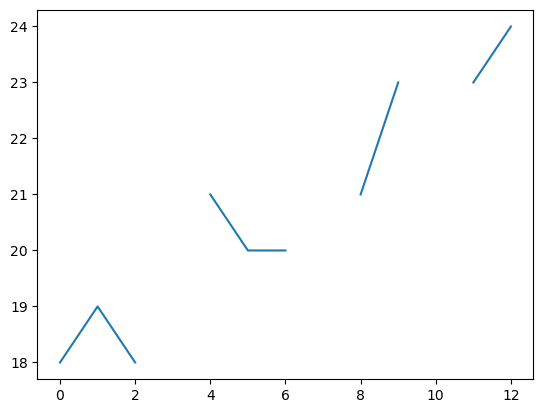

In [60]:
temp.Temperature.plot()

In [61]:
temp=temp.interpolate() # per riempire le temperatura possiamo usare un interpolazione
temp

,Giorno,Temperature
0,0,18.0
1,1,19.0
2,2,18.0
3,3,19.5
4,4,21.0
5,5,20.0
6,6,20.0
7,7,20.5
8,8,21.0
9,9,23.0


<Axes: >

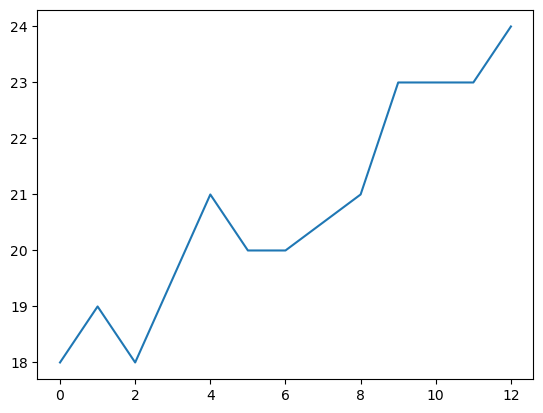

In [62]:
temp.Temperature.plot()

# Esercizio 1/2 
Nel pacchetto os della standard library c'è la funzione os.listdir() che permette di avere la lista dei nomi di file all'interno di una directory; senza input di default li cerca nella directory di lavoro corrente, altrimenti si può passare un path per esaminare una directory specifica, ad esempio os.listdir("mio_progetto/beginner_datasets/")
* Nella directory dei beginner_datasets, quali sono i dataset che contengono dati nulli?

In [63]:
percorso_attuale=os.getcwd()
path="/beginner_datasets/"
lista=os.listdir(percorso_attuale+path)
lista

['amazon.csv',
 'anomaly.csv',
 'asia_gdp.csv',
 'automobile.csv',
 'bank.csv',
 'bar_locations.csv',
 'bike.csv',
 'blood.csv',
 'boston.csv',
 'cancer.csv',
 'concrete.csv',
 'credit.csv',
 'diabetes.csv',
 'diamond.csv',
 'election.csv',
 'elections.csv',
 'electrical_grid.csv',
 'employee.csv',
 'energy.csv',
 'facebook.csv',
 'forest.csv',
 'france.csv',
 'germany.csv',
 'glass.csv',
 'gold.csv',
 'heart.csv',
 'heart_disease.csv',
 'hepatitis.csv',
 'house.csv',
 'income.csv',
 'insurance.csv',
 'ipl.csv',
 'iris.csv',
 'jewellery.csv',
 'juice.csv',
 'kiva.csv',
 'Mappa-dei-pub-circoli-locali-in-Italia.json',
 'metal_bands_2017.csv',
 'mice.csv',
 'migration.csv',
 'nba.csv',
 'parkinsons.csv',
 'party_in_nyc.csv',
 'pokemon.csv',
 'poker.csv',
 'population.csv',
 'public_health.csv',
 'pycaret_datasets.xlsx',
 'questions.csv',
 'satellite.csv',
 'seeds.csv',
 'spx.csv',
 'stockdata.csv',
 'test_parties.csv',
 'traffic.csv',
 'train_parties.csv',
 'tweets.csv',
 'wholesale.csv',

In [64]:
listap=pd.Series(lista)

In [65]:
filtro_csv=listap.str.contains('.csv')
listap=listap.loc[filtro_csv]
listap

0                         amazon.csv
1                        anomaly.csv
2                       asia_gdp.csv
3                     automobile.csv
4                           bank.csv
5                  bar_locations.csv
6                           bike.csv
7                          blood.csv
8                         boston.csv
9                         cancer.csv
10                      concrete.csv
11                        credit.csv
12                      diabetes.csv
13                       diamond.csv
14                      election.csv
15                     elections.csv
16               electrical_grid.csv
17                      employee.csv
18                        energy.csv
19                      facebook.csv
20                        forest.csv
21                        france.csv
22                       germany.csv
23                         glass.csv
24                          gold.csv
25                         heart.csv
26                 heart_disease.csv
2

# Esercizio 2/2 
* 1. Dovremo usare un ciclo for per esaminare tutti i nomi dei file
* 2. Dovremo selezionare solo i nomi di file con estensione .csv (quindi usare un costrutto if)
* 3. Nel corpo dovremo leggere di volta in volta il file in esame, e caricarlo in un DataFrame con la funzione .read_csv()
* 4. Sul DataFrame dovremo utilizzare il metodo .isna() per trovare la maschera booleana dei dati nulli
* 5. Dovremo contare i dati nulli, utilizzando .sum(); potremmo doverlo utilizzare più di una volta
* 6. Dovremo stampare, o memorizzare in una list, solo i nomi dei file che contengono dati nulli

In [69]:
list_file_null=[]
for nome in listap:
    percorso_attuale=os.getcwd()
    path="/beginner_datasets/"+nome
    df=pd.read_csv(percorso_attuale+path,encoding="latin1")
    for i in df.columns:
        dfnull=df[i].isna().sum()
        if dfnull!=0:
            list_file_null.append(nome)

In [70]:
listpd=pd.Series(list_file_null)
print(listpd.unique())

['automobile.csv' 'elections.csv' 'france.csv' 'hepatitis.csv' 'house.csv'
 'income.csv' 'metal_bands_2017.csv' 'mice.csv' 'nba.csv'
 'party_in_nyc.csv' 'pokemon.csv' 'population.csv' 'seeds.csv'
 'traffic.csv' 'wikipedia.csv' 'world_population_1960_2015.csv']
